In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.constants import FIG_DIR
from dogo.results import get_scores_df

In [4]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [5]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-HC-M_10000", "D4RL: M"),
    ("D4RL-HC-ME_10000", "D4RL: ME"),
    ("D4RL-HC-MR_10000", "D4RL: MR"),
    ("D4RL-HC-R_10000", "D4RL: R"),
    ("RAND-1_10000", "Random 1"),
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
]

In [6]:
# evaluation_datasets_lables = [
#     ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
#     ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
#     ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
#     ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
#     ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
#     ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
#     ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
#     ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
#     ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
#     ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
#     ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
#     ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
#     ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
#     ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
#     ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
#     ("D4RL-HC-M_10000", "D4RL Medium"),
#     ("D4RL-HC-ME_10000", "D4RL Medium-Expert"),
#     ("D4RL-HC-MR_10000", "D4RL Medium-Replay"),
#     ("D4RL-HC-R_10000", "D4RL Random"),
#     ("SAC-RT-0.1M-4-P0_10000", "Softlearning 1 - 0.1M Steps"),
#     ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
#     ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
#     ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
#     ("SAC-RT-2M-4-P0_10000", "Softlearning 1 - 2M Steps"),
#     ("SAC-RT-3M-4-P0_10000", "Softlearning 1 - 3M Steps"),
#     ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
#     ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
#     ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
#     ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
#     ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
#     ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
#     ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
#     ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
#     ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
#     ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
#     ("RAND-1_10000", "Random Policy 1"),
#     ("RAND-2_10000", "Random Policy 2"),
#     ("RAND-3_10000", "Random Policy 3"),
# ]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

# Softlearning Experiment Loading

In [7]:
sac_experiments_01_steps  = ['MP674', 'MP675', 'MP676']
sac_experiments_025_steps = ['MP551', 'MP552', 'MP553']
sac_experiments_05_steps  = ['MP554', 'MP555', 'MP556']
sac_experiments_1_steps   = ['MP557', 'MP558', 'MP559']
sac_experiments_2_steps   = ['MP560', 'MP561', 'MP562']
sac_experiments_3_steps   = ['MP563', 'MP564', 'MP565']

sac_labels = [f'SL: {i}' for i in ['0.1M', '0.25M', '0.5M', '1M', '2M', '3M']]
sac_training_eval_ds = [
    "SAC-RT-0.1M-4-P0_10000",
    "SAC-RT-0.25M-4-P0_10000",
    "SAC-RT-0.5M-4-P0_10000",
    "SAC-RT-1M-4-P0_10000",
    "SAC-RT-2M-4-P0_10000",
    "SAC-RT-3M-4-P0_10000",
]

In [8]:
sac_scores_01_steps_df = get_scores_df(sac_experiments_01_steps, evaluation_datasets)
sac_scores_025_steps_df = get_scores_df(sac_experiments_025_steps, evaluation_datasets)
sac_scores_05_steps_df = get_scores_df(sac_experiments_05_steps, evaluation_datasets)
sac_scores_1_steps_df = get_scores_df(sac_experiments_1_steps, evaluation_datasets)
sac_scores_2_steps_df = get_scores_df(sac_experiments_2_steps, evaluation_datasets)
sac_scores_3_steps_df = get_scores_df(sac_experiments_3_steps, evaluation_datasets)

In [9]:
sac_scores_01_steps_groups = (sac_scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_01_steps_avgs_df = sac_scores_01_steps_groups.mean().reset_index()
sac_scores_01_steps_mins_df = sac_scores_01_steps_groups.min().reset_index()
sac_scores_01_steps_maxs_df = sac_scores_01_steps_groups.max().reset_index()

sac_scores_025_steps_groups = (sac_scores_025_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_025_steps_avgs_df = sac_scores_025_steps_groups.mean().reset_index()
sac_scores_025_steps_mins_df = sac_scores_025_steps_groups.min().reset_index()
sac_scores_025_steps_maxs_df = sac_scores_025_steps_groups.max().reset_index()

sac_scores_05_steps_groups = (sac_scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_05_steps_avgs_df = sac_scores_05_steps_groups.mean().reset_index()
sac_scores_05_steps_mins_df = sac_scores_05_steps_groups.min().reset_index()
sac_scores_05_steps_maxs_df = sac_scores_05_steps_groups.max().reset_index()

sac_scores_1_steps_groups = (sac_scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_1_steps_avgs_df = sac_scores_1_steps_groups.mean().reset_index()
sac_scores_1_steps_mins_df = sac_scores_1_steps_groups.min().reset_index()
sac_scores_1_steps_maxs_df = sac_scores_1_steps_groups.max().reset_index()

sac_scores_2_steps_groups = (sac_scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_2_steps_avgs_df = sac_scores_2_steps_groups.mean().reset_index()
sac_scores_2_steps_mins_df = sac_scores_2_steps_groups.min().reset_index()
sac_scores_2_steps_maxs_df = sac_scores_2_steps_groups.max().reset_index()

sac_scores_3_steps_groups = (sac_scores_3_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_3_steps_avgs_df = sac_scores_3_steps_groups.mean().reset_index()
sac_scores_3_steps_mins_df = sac_scores_3_steps_groups.min().reset_index()
sac_scores_3_steps_maxs_df = sac_scores_3_steps_groups.max().reset_index()

# D3RLPY Experiment Loading

In [10]:
d3rlpy_experiments_01_steps = ['MP449', 'MP450', 'MP451']
d3rlpy_experiments_02_steps = ['MP452', 'MP453', 'MP454']
d3rlpy_experiments_05_steps = ['MP455', 'MP456', 'MP457']
d3rlpy_experiments_1_steps  = ['MP458', 'MP459', 'MP460']
d3rlpy_experiments_2_steps  = ['MP533', 'MP534', 'MP535']

d3rlpy_experiments_01_steps_1M = ['MP497', 'MP498', 'MP499']
d3rlpy_experiments_02_steps_1M = ['MP500', 'MP501', 'MP502']
d3rlpy_experiments_05_steps_1M = ['MP503', 'MP504', 'MP505']
d3rlpy_experiments_1_steps_1M  = ['MP506', 'MP507', 'MP508']
d3rlpy_experiments_2_steps_1M  = ['MP539', 'MP540', 'MP541']

d3rlpy_experiments_01_steps_at = ['MP473', 'MP474', 'MP475']
d3rlpy_experiments_02_steps_at = ['MP476', 'MP477', 'MP478']
d3rlpy_experiments_05_steps_at = ['MP479', 'MP480', 'MP481']
d3rlpy_experiments_1_steps_at  = ['MP482', 'MP483', 'MP484']
d3rlpy_experiments_2_steps_at  = ['MP536', 'MP537', 'MP538']

d3rlpy_steps_labels = ['0.1M', '0.2M', '0.5M', '1M', '2M']
d3rlpy_labels = [f'D3RLPY: {i}' for i in d3rlpy_steps_labels]
d3rlpy_training_eval_ds = [
    "D3RLPY-RT-0.1M-4-P0_10000",
    "D3RLPY-RT-0.2M-4-P0_10000",
    "D3RLPY-RT-0.5M-4-P0_10000",
    "D3RLPY-RT-1M-4-P0_10000",
    "D3RLPY-RT-2M-4-P0_10000",
]

In [11]:
d3rlpy_scores_01_steps_df = get_scores_df(d3rlpy_experiments_01_steps, evaluation_datasets)
d3rlpy_scores_02_steps_df = get_scores_df(d3rlpy_experiments_02_steps, evaluation_datasets)
d3rlpy_scores_05_steps_df = get_scores_df(d3rlpy_experiments_05_steps, evaluation_datasets)
d3rlpy_scores_1_steps_df = get_scores_df(d3rlpy_experiments_1_steps, evaluation_datasets)
d3rlpy_scores_2_steps_df = get_scores_df(d3rlpy_experiments_2_steps, evaluation_datasets)

d3rlpy_scores_01_steps_df_1M = get_scores_df(d3rlpy_experiments_01_steps_1M, evaluation_datasets)
d3rlpy_scores_02_steps_df_1M = get_scores_df(d3rlpy_experiments_02_steps_1M, evaluation_datasets)
d3rlpy_scores_05_steps_df_1M = get_scores_df(d3rlpy_experiments_05_steps_1M, evaluation_datasets)
d3rlpy_scores_1_steps_df_1M = get_scores_df(d3rlpy_experiments_1_steps_1M, evaluation_datasets)
d3rlpy_scores_2_steps_df_1M = get_scores_df(d3rlpy_experiments_2_steps_1M, evaluation_datasets)

d3rlpy_scores_01_steps_df_at = get_scores_df(d3rlpy_experiments_01_steps_at, evaluation_datasets)
d3rlpy_scores_02_steps_df_at = get_scores_df(d3rlpy_experiments_02_steps_at, evaluation_datasets)
d3rlpy_scores_05_steps_df_at = get_scores_df(d3rlpy_experiments_05_steps_at, evaluation_datasets)
d3rlpy_scores_1_steps_df_at = get_scores_df(d3rlpy_experiments_1_steps_at, evaluation_datasets)
d3rlpy_scores_2_steps_df_at = get_scores_df(d3rlpy_experiments_2_steps_at, evaluation_datasets)

In [12]:
d3rlpy_scores_01_steps_groups = (d3rlpy_scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_01_steps_avgs_df = d3rlpy_scores_01_steps_groups.mean().reset_index()
d3rlpy_scores_01_steps_mins_df = d3rlpy_scores_01_steps_groups.min().reset_index()
d3rlpy_scores_01_steps_maxs_df = d3rlpy_scores_01_steps_groups.max().reset_index()

d3rlpy_scores_02_steps_groups = (d3rlpy_scores_02_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_02_steps_avgs_df = d3rlpy_scores_02_steps_groups.mean().reset_index()
d3rlpy_scores_02_steps_mins_df = d3rlpy_scores_02_steps_groups.min().reset_index()
d3rlpy_scores_02_steps_maxs_df = d3rlpy_scores_02_steps_groups.max().reset_index()

d3rlpy_scores_05_steps_groups = (d3rlpy_scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_05_steps_avgs_df = d3rlpy_scores_05_steps_groups.mean().reset_index()
d3rlpy_scores_05_steps_mins_df = d3rlpy_scores_05_steps_groups.min().reset_index()
d3rlpy_scores_05_steps_maxs_df = d3rlpy_scores_05_steps_groups.max().reset_index()

d3rlpy_scores_1_steps_groups = (d3rlpy_scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_1_steps_avgs_df = d3rlpy_scores_1_steps_groups.mean().reset_index()
d3rlpy_scores_1_steps_mins_df = d3rlpy_scores_1_steps_groups.min().reset_index()
d3rlpy_scores_1_steps_maxs_df = d3rlpy_scores_1_steps_groups.max().reset_index()

d3rlpy_scores_2_steps_groups = (d3rlpy_scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_2_steps_avgs_df = d3rlpy_scores_2_steps_groups.mean().reset_index()
d3rlpy_scores_2_steps_mins_df = d3rlpy_scores_2_steps_groups.min().reset_index()
d3rlpy_scores_2_steps_maxs_df = d3rlpy_scores_2_steps_groups.max().reset_index()

In [13]:
d3rlpy_scores_01_steps_groups_1M = (
    d3rlpy_scores_01_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_01_steps_avgs_df_1M = d3rlpy_scores_01_steps_groups_1M.mean().reset_index()
d3rlpy_scores_01_steps_stds_df_1M = d3rlpy_scores_01_steps_groups_1M.std(ddof=0).reset_index()
d3rlpy_scores_01_steps_mins_df_1M = d3rlpy_scores_01_steps_groups_1M.min().reset_index()
d3rlpy_scores_01_steps_maxs_df_1M = d3rlpy_scores_01_steps_groups_1M.max().reset_index()

d3rlpy_scores_02_steps_groups_1M = (
    d3rlpy_scores_02_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_02_steps_avgs_df_1M = d3rlpy_scores_02_steps_groups_1M.mean().reset_index()
d3rlpy_scores_02_steps_stds_df_1M = d3rlpy_scores_02_steps_groups_1M.std(ddof=0).reset_index()
d3rlpy_scores_02_steps_mins_df_1M = d3rlpy_scores_02_steps_groups_1M.min().reset_index()
d3rlpy_scores_02_steps_maxs_df_1M = d3rlpy_scores_02_steps_groups_1M.max().reset_index()

d3rlpy_scores_05_steps_groups_1M = (
    d3rlpy_scores_05_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_05_steps_avgs_df_1M = d3rlpy_scores_05_steps_groups_1M.mean().reset_index()
d3rlpy_scores_05_steps_stds_df_1M = d3rlpy_scores_05_steps_groups_1M.std(ddof=0).reset_index()
d3rlpy_scores_05_steps_mins_df_1M = d3rlpy_scores_05_steps_groups_1M.min().reset_index()
d3rlpy_scores_05_steps_maxs_df_1M = d3rlpy_scores_05_steps_groups_1M.max().reset_index()

d3rlpy_scores_1_steps_groups_1M = (
    d3rlpy_scores_1_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_1_steps_avgs_df_1M = d3rlpy_scores_1_steps_groups_1M.mean().reset_index()
d3rlpy_scores_1_steps_stds_df_1M = d3rlpy_scores_1_steps_groups_1M.std(ddof=0).reset_index()
d3rlpy_scores_1_steps_mins_df_1M = d3rlpy_scores_1_steps_groups_1M.min().reset_index()
d3rlpy_scores_1_steps_maxs_df_1M = d3rlpy_scores_1_steps_groups_1M.max().reset_index()

d3rlpy_scores_2_steps_groups_1M = (
    d3rlpy_scores_2_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_2_steps_avgs_df_1M = d3rlpy_scores_2_steps_groups_1M.mean().reset_index()
d3rlpy_scores_2_steps_stds_df_1M = d3rlpy_scores_2_steps_groups_1M.std(ddof=0).reset_index()
d3rlpy_scores_2_steps_mins_df_1M = d3rlpy_scores_2_steps_groups_1M.min().reset_index()
d3rlpy_scores_2_steps_maxs_df_1M = d3rlpy_scores_2_steps_groups_1M.max().reset_index()

In [14]:
d3rlpy_scores_01_steps_groups_at = (
    d3rlpy_scores_01_steps_df_at.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_01_steps_avgs_df_at = d3rlpy_scores_01_steps_groups_at.mean().reset_index()
d3rlpy_scores_01_steps_stds_df_at = d3rlpy_scores_01_steps_groups_at.std(ddof=0).reset_index()
d3rlpy_scores_01_steps_mins_df_at = d3rlpy_scores_01_steps_groups_at.min().reset_index()
d3rlpy_scores_01_steps_maxs_df_at = d3rlpy_scores_01_steps_groups_at.max().reset_index()

d3rlpy_scores_02_steps_groups_at = (
    d3rlpy_scores_02_steps_df_at.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_02_steps_avgs_df_at = d3rlpy_scores_02_steps_groups_at.mean().reset_index()
d3rlpy_scores_02_steps_stds_df_at = d3rlpy_scores_02_steps_groups_at.std(ddof=0).reset_index()
d3rlpy_scores_02_steps_mins_df_at = d3rlpy_scores_02_steps_groups_at.min().reset_index()
d3rlpy_scores_02_steps_maxs_df_at = d3rlpy_scores_02_steps_groups_at.max().reset_index()

d3rlpy_scores_05_steps_groups_at = (
    d3rlpy_scores_05_steps_df_at.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_05_steps_avgs_df_at = d3rlpy_scores_05_steps_groups_at.mean().reset_index()
d3rlpy_scores_05_steps_stds_df_at = d3rlpy_scores_05_steps_groups_at.std(ddof=0).reset_index()
d3rlpy_scores_05_steps_mins_df_at = d3rlpy_scores_05_steps_groups_at.min().reset_index()
d3rlpy_scores_05_steps_maxs_df_at = d3rlpy_scores_05_steps_groups_at.max().reset_index()

d3rlpy_scores_1_steps_groups_at = (
    d3rlpy_scores_1_steps_df_at.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_1_steps_avgs_df_at = d3rlpy_scores_1_steps_groups_at.mean().reset_index()
d3rlpy_scores_1_steps_stds_df_at = d3rlpy_scores_1_steps_groups_at.std(ddof=0).reset_index()
d3rlpy_scores_1_steps_mins_df_at = d3rlpy_scores_1_steps_groups_at.min().reset_index()
d3rlpy_scores_1_steps_maxs_df_at = d3rlpy_scores_1_steps_groups_at.max().reset_index()

d3rlpy_scores_2_steps_groups_at = (
    d3rlpy_scores_2_steps_df_at.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_scores_2_steps_avgs_df_at = d3rlpy_scores_2_steps_groups_at.mean().reset_index()
d3rlpy_scores_2_steps_stds_df_at = d3rlpy_scores_2_steps_groups_at.std(ddof=0).reset_index()
d3rlpy_scores_2_steps_mins_df_at = d3rlpy_scores_2_steps_groups_at.min().reset_index()
d3rlpy_scores_2_steps_maxs_df_at = d3rlpy_scores_2_steps_groups_at.max().reset_index()

# REx

In [15]:
rex_labels = ['No REx', '0.1', '1.0', '5.0', '10.0']

# MIXED-3

In [16]:
m3_experiments_no_rex = ['MP329', 'MP330', 'MP331']
m3_experiments_rex_01 = ['MP332', 'MP333', 'MP334']
m3_experiments_rex_1  = ['MP335', 'MP336', 'MP337']
m3_experiments_rex_5  = ['MP723', 'MP724', 'MP725']
m3_experiments_rex_10 = ['MP338', 'MP339', 'MP340']

m3_labels = [f'N&SO - {i}' for i in ['No REx', 'REx - $\\beta=0.1$', 'REx - $\\beta=1.0$', 'REx - $\\beta=5.0$', 'REx - $\\beta=10.0$']]
m3_labels

['N&SO - No REx',
 'N&SO - REx - $\\beta=0.1$',
 'N&SO - REx - $\\beta=1.0$',
 'N&SO - REx - $\\beta=5.0$',
 'N&SO - REx - $\\beta=10.0$']

In [17]:
m3_training_datasets_labels = [
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY\n0.1M Steps"),
]
m3_training_datasets = [i[0] for i in m3_training_datasets_labels]
m3_training_labels = [i[1] for i in m3_training_datasets_labels]

In [18]:
m3_scores_no_rex_df = get_scores_df(m3_experiments_no_rex, evaluation_datasets)
m3_scores_rex_01_df = get_scores_df(m3_experiments_rex_01, evaluation_datasets)
m3_scores_rex_1_df = get_scores_df(m3_experiments_rex_1, evaluation_datasets)
m3_scores_rex_5_df = get_scores_df(m3_experiments_rex_5, evaluation_datasets)
m3_scores_rex_10_df = get_scores_df(m3_experiments_rex_10, evaluation_datasets)

In [19]:
m3_scores_no_rex_groups = (m3_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_no_rex_avgs_df = m3_scores_no_rex_groups.mean().reset_index()
m3_scores_no_rex_mins_df = m3_scores_no_rex_groups.min().reset_index()
m3_scores_no_rex_maxs_df = m3_scores_no_rex_groups.max().reset_index()

m3_scores_rex_01_groups = (m3_scores_rex_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_01_avgs_df = m3_scores_rex_01_groups.mean().reset_index()
m3_scores_rex_01_mins_df = m3_scores_rex_01_groups.min().reset_index()
m3_scores_rex_01_maxs_df = m3_scores_rex_01_groups.max().reset_index()

m3_scores_rex_1_groups = (m3_scores_rex_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_1_avgs_df = m3_scores_rex_1_groups.mean().reset_index()
m3_scores_rex_1_mins_df = m3_scores_rex_1_groups.min().reset_index()
m3_scores_rex_1_maxs_df = m3_scores_rex_1_groups.max().reset_index()

m3_scores_rex_5_groups = (m3_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_5_avgs_df = m3_scores_rex_5_groups.mean().reset_index()
m3_scores_rex_5_mins_df = m3_scores_rex_5_groups.min().reset_index()
m3_scores_rex_5_maxs_df = m3_scores_rex_5_groups.max().reset_index()

m3_scores_rex_10_groups = (m3_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_10_avgs_df = m3_scores_rex_10_groups.mean().reset_index()
m3_scores_rex_10_mins_df = m3_scores_rex_10_groups.min().reset_index()
m3_scores_rex_10_maxs_df = m3_scores_rex_10_groups.max().reset_index()

# MIXED-RT-1

In [20]:
mrt1_experiments_no_rex = ['MP748', 'MP749', 'MP750']
mrt1_experiments_rex_01 = ['MP751', 'MP752', 'MP753']
mrt1_experiments_rex_1  = ['MP754', 'MP755', 'MP756']
mrt1_experiments_rex_5  = ['MP772', 'MP773', 'MP774']
mrt1_experiments_rex_10 = ['MP757', 'MP758', 'MP759']

mrt1_labels = [f'D&O - {i}' for i in ['No REx', 'REx - $\\beta=0.1$', 'REx - $\\beta=1.0$', 'REx - $\\beta=5.0$', 'REx - $\\beta=10.0$']]
mrt1_labels

['D&O - No REx',
 'D&O - REx - $\\beta=0.1$',
 'D&O - REx - $\\beta=1.0$',
 'D&O - REx - $\\beta=5.0$',
 'D&O - REx - $\\beta=10.0$']

In [21]:
mrt_training_datasets_labels = [
    ("RAND-2_10000", "Random 2"),
    ("SAC-RT-0.25M-4-P0_10000", "SL\n0.25M Steps"),
    ("SAC-RT-1M-4-P0_10000", "SL\n1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY\n0.2M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY\n2M Steps"),
]
mrt_training_datasets = [i[0] for i in mrt_training_datasets_labels]
mrt_training_labels = [i[1] for i in mrt_training_datasets_labels]

In [22]:
mrt1_scores_no_rex_df = get_scores_df(mrt1_experiments_no_rex, evaluation_datasets)
mrt1_scores_rex_01_df = get_scores_df(mrt1_experiments_rex_01, evaluation_datasets)
mrt1_scores_rex_1_df = get_scores_df(mrt1_experiments_rex_1, evaluation_datasets)
mrt1_scores_rex_5_df = get_scores_df(mrt1_experiments_rex_5, evaluation_datasets)
mrt1_scores_rex_10_df = get_scores_df(mrt1_experiments_rex_10, evaluation_datasets)

In [23]:
mrt1_scores_no_rex_groups = (mrt1_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_no_rex_avgs_df = mrt1_scores_no_rex_groups.mean().reset_index()
mrt1_scores_no_rex_mins_df = mrt1_scores_no_rex_groups.min().reset_index()
mrt1_scores_no_rex_maxs_df = mrt1_scores_no_rex_groups.max().reset_index()

mrt1_scores_rex_01_groups = (mrt1_scores_rex_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_01_avgs_df = mrt1_scores_rex_01_groups.mean().reset_index()
mrt1_scores_rex_01_mins_df = mrt1_scores_rex_01_groups.min().reset_index()
mrt1_scores_rex_01_maxs_df = mrt1_scores_rex_01_groups.max().reset_index()

mrt1_scores_rex_1_groups = (mrt1_scores_rex_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_1_avgs_df = mrt1_scores_rex_1_groups.mean().reset_index()
mrt1_scores_rex_1_mins_df = mrt1_scores_rex_1_groups.min().reset_index()
mrt1_scores_rex_1_maxs_df = mrt1_scores_rex_1_groups.max().reset_index()

mrt1_scores_rex_5_groups = (mrt1_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_5_avgs_df = mrt1_scores_rex_5_groups.mean().reset_index()
mrt1_scores_rex_5_mins_df = mrt1_scores_rex_5_groups.min().reset_index()
mrt1_scores_rex_5_maxs_df = mrt1_scores_rex_5_groups.max().reset_index()

mrt1_scores_rex_10_groups = (mrt1_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_10_avgs_df = mrt1_scores_rex_10_groups.mean().reset_index()
mrt1_scores_rex_10_mins_df = mrt1_scores_rex_10_groups.min().reset_index()
mrt1_scores_rex_10_maxs_df = mrt1_scores_rex_10_groups.max().reset_index()

# Groupings

In [24]:
d3rlpy_experiment_score_avg_dfs = [
    d3rlpy_scores_01_steps_avgs_df,
    d3rlpy_scores_02_steps_avgs_df,
    d3rlpy_scores_05_steps_avgs_df,
    d3rlpy_scores_1_steps_avgs_df,
    d3rlpy_scores_2_steps_avgs_df,
]

d3rlpy_experiment_score_avg_dfs_1M = [
    d3rlpy_scores_01_steps_avgs_df_1M,
    d3rlpy_scores_02_steps_avgs_df_1M,
    d3rlpy_scores_05_steps_avgs_df_1M,
    d3rlpy_scores_1_steps_avgs_df_1M,
    d3rlpy_scores_2_steps_avgs_df_1M,
]

d3rlpy_experiment_score_avg_dfs_at = [
    d3rlpy_scores_01_steps_avgs_df_at,
    d3rlpy_scores_02_steps_avgs_df_at,
    d3rlpy_scores_05_steps_avgs_df_at,
    d3rlpy_scores_1_steps_avgs_df_at,
    d3rlpy_scores_2_steps_avgs_df_at,
]

sac_experiment_score_avg_dfs = [
    sac_scores_01_steps_avgs_df,
    sac_scores_025_steps_avgs_df,
    sac_scores_05_steps_avgs_df,
    sac_scores_1_steps_avgs_df,
    sac_scores_2_steps_avgs_df,
    sac_scores_3_steps_avgs_df,
]

initial_experiment_score_avg_dfs = [
    *sac_experiment_score_avg_dfs,
    *d3rlpy_experiment_score_avg_dfs
]
initial_experiment_labels = [*sac_labels, *d3rlpy_labels]
initial_experiment_training_eval_ds = [*sac_training_eval_ds, *d3rlpy_training_eval_ds]

In [25]:
m3_score_avg_dfs = [
    m3_scores_no_rex_avgs_df,
    m3_scores_rex_01_avgs_df,
    m3_scores_rex_1_avgs_df,
    m3_scores_rex_5_avgs_df,
    m3_scores_rex_10_avgs_df,
]

mrt1_score_avg_dfs = [
    mrt1_scores_no_rex_avgs_df,
    mrt1_scores_rex_01_avgs_df,
    mrt1_scores_rex_1_avgs_df,
    mrt1_scores_rex_5_avgs_df,
    mrt1_scores_rex_10_avgs_df,
]

experiment_score_avg_dfs = [
    *m3_score_avg_dfs,
    *mrt1_score_avg_dfs
]
experiment_labels = [*sac_labels, *d3rlpy_labels, *m3_labels, *mrt1_labels]
final_experiment_labels = [*m3_labels, *mrt1_labels]
final_experiment_training_eval_ds_groups = [*[m3_training_datasets]*5, *[mrt_training_datasets]*5]

In [26]:
evaluation_datasets_groups = {
    'D4RL': [
        "D4RL-HC-M_10000",
        "D4RL-HC-ME_10000",
        "D4RL-HC-MR_10000",
        "D4RL-HC-R_10000",
    ],
    'Softlearning': [
        "SAC-RT-0.1M-4-P0_10000", 
        "SAC-RT-0.25M-4-P0_10000", 
        "SAC-RT-0.5M-4-P0_10000", 
        "SAC-RT-1M-4-P0_10000",
        "SAC-RT-2M-4-P0_10000",
        "SAC-RT-3M-4-P0_10000",
        "SAC-RT-0.25M-2-P0_10000", 
        "SAC-RT-0.5M-2-P0_10000", 
        "SAC-RT-1M-2-P0_10000",
        "SAC-RT-2M-2-P0_10000",
        "SAC-RT-3M-2-P0_10000",
        "SAC-RT-0.25M-3-P0_10000", 
        "SAC-RT-0.5M-3-P0_10000", 
        "SAC-RT-1M-3-P0_10000",
        "SAC-RT-2M-3-P0_10000",
        "SAC-RT-3M-3-P0_10000",
    ],
    'D3RLPY': [
        "D3RLPY-RT-0.1M-4-P0_10000",
        "D3RLPY-RT-0.2M-4-P0_10000",
        "D3RLPY-RT-0.5M-4-P0_10000",
        "D3RLPY-RT-1M-4-P0_10000",
        "D3RLPY-RT-2M-4-P0_10000",
        "D3RLPY-RT-0.1M-2-P0_10000",
        "D3RLPY-RT-0.2M-2-P0_10000",
        "D3RLPY-RT-0.5M-2-P0_10000",
        "D3RLPY-RT-1M-2-P0_10000",
        "D3RLPY-RT-2M-2-P0_10000",
        "D3RLPY-RT-0.1M-3-P0_10000",
        "D3RLPY-RT-0.2M-3-P0_10000",
        "D3RLPY-RT-0.5M-3-P0_10000",
        "D3RLPY-RT-1M-3-P0_10000",
        "D3RLPY-RT-2M-3-P0_10000",
    ],
    'Random': [
        "RAND-1_10000",
        "RAND-2_10000",
        "RAND-3_10000",
    ]
}
n_evaluation_datasets = len([item for sublist in [list(i) for i in evaluation_datasets_groups.values()] for item in sublist])

In [27]:
import pandas as pd

,0,1,2
0,0.44,4.71,19.93
1,0.14,477.94,1888.46
2,0.11,292.01,1177.09
3,0.20,3.35,18.53
4,0.28,21.43,71.61
5,0.33,17.42,56.56
6,0.16,9.22,29.11
7,0.14,11.36,42.98
8,0.15,43.15,153.77
9,0.25,29.54,104.40


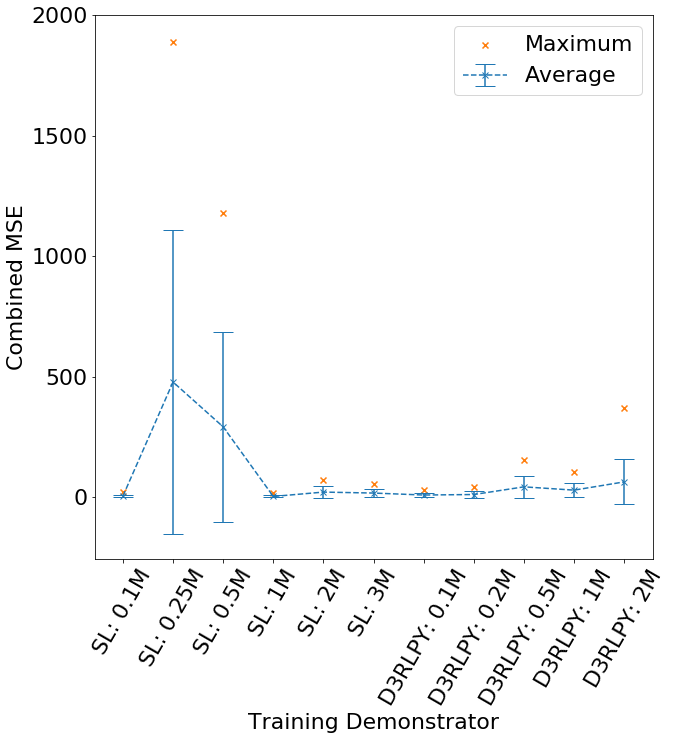

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'

train_mse_avgs = []
train_mse_stds = []

test_mse_avgs = []
test_mse_stds = []
test_mse_maxs = []
for train_ds_label, train_eval_ds, train_res_df in zip(initial_experiment_labels, initial_experiment_training_eval_ds, initial_experiment_score_avg_dfs):    
    train_mse_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, metric].mean())
    train_mse_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, metric].std(ddof=0))

    test_mse_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, metric].mean())
    test_mse_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, metric].std(ddof=0))
    test_mse_maxs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, metric].max())

ax.errorbar(initial_experiment_labels, test_mse_avgs, test_mse_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.scatter(initial_experiment_labels, test_mse_maxs, marker='x', color=cols[1], label='Maximum')
ax.set_xticklabels(initial_experiment_labels, rotation=60)
ax.set_xlabel('Training Demonstrator')
ax.set_ylabel('Combined MSE')
# ax.set_ylim(-210, 500)
plt.legend()
# fig.savefig(os.path.join(FIG_DIR, 'ch4', 'individual_demonstrator_combined_mse_avgs.png'), pad_inches=0.2, bbox_inches='tight')
pd.DataFrame([train_mse_avgs, test_mse_avgs, test_mse_maxs]).T.round(2)

,0,1,2
0,27,-519,-3424
1,42,-55048,-199632
2,39,-54414,-224586
3,36,-197,-1059
4,34,-1772,-6452
5,35,-1308,-4341
6,38,-3183,-20582
7,40,-5384,-25543
8,40,-26300,-193527
9,38,-15209,-94565


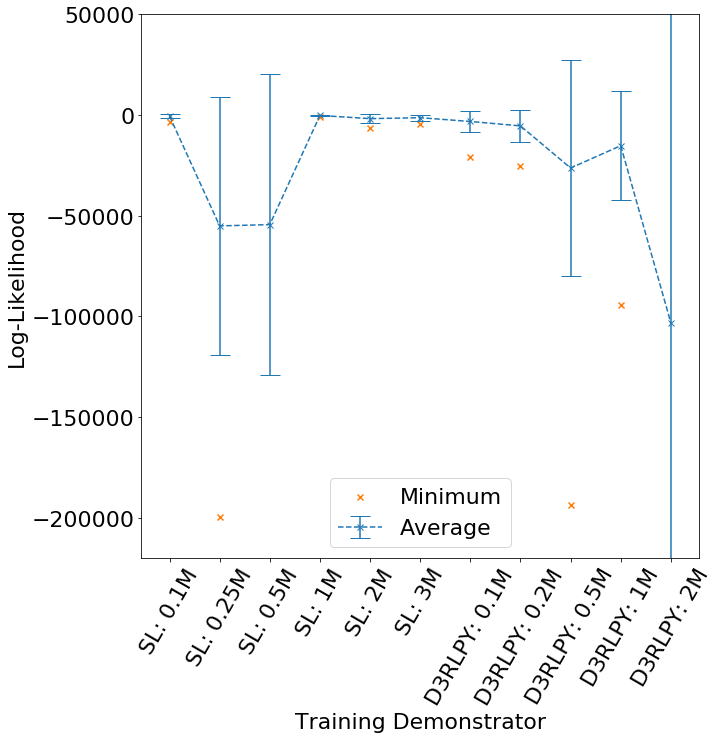

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'

train_ll_avgs = []
train_ll_stds = []

test_ll_avgs = []
test_ll_stds = []
test_ll_mins = []
for train_ds_label, train_eval_ds, train_res_df in zip(initial_experiment_labels, initial_experiment_training_eval_ds, initial_experiment_score_avg_dfs):    
    train_ll_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, metric].mean())
    train_ll_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, metric].std(ddof=0))

    test_ll_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, metric].mean())
    test_ll_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, metric].std(ddof=0))
    test_ll_mins.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, metric].min())

ax.errorbar(initial_experiment_labels, test_ll_avgs, test_ll_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.scatter(initial_experiment_labels, test_ll_mins, marker='x', color=cols[1], label='Minimum')
ax.set_xticklabels(initial_experiment_labels, rotation=60)
ax.set_xlabel('Training Demonstrator')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(-220000, 50000)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'individual_demonstrator_log_likelihood_avgs.png'), pad_inches=0.2, bbox_inches='tight')
pd.DataFrame([train_ll_avgs, test_ll_avgs, test_ll_mins]).T.astype(int)

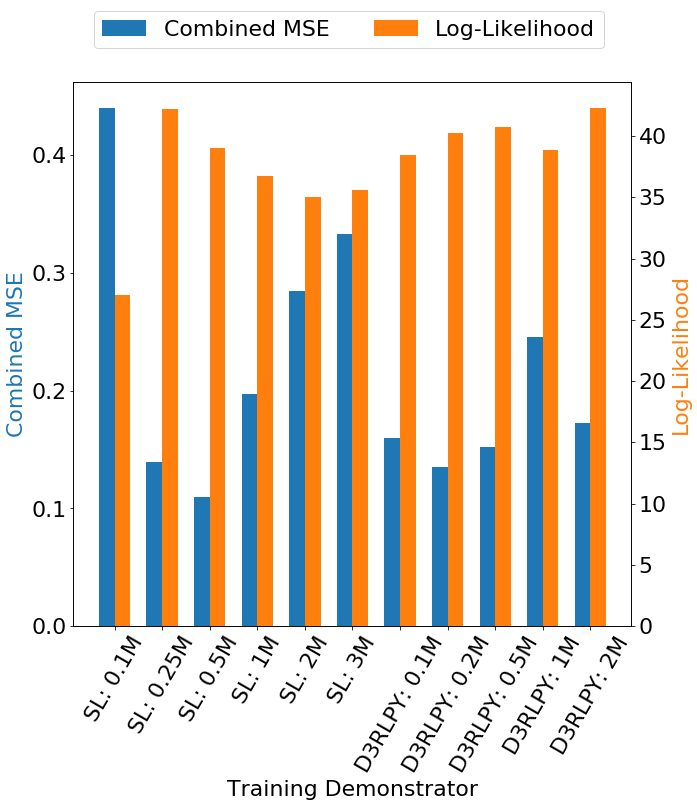

In [93]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
ax2 = ax1.twinx()

trans1 = Affine2D().translate(-0.33/2, 0.0) + ax1.transData
trans2 = Affine2D().translate(+0.33/2, 0.0) + ax2.transData

ax1.bar(initial_experiment_labels, train_mse_avgs, color=cols[0], label='Combined MSE', width=0.33, transform=trans1)
ax2.bar(initial_experiment_labels, train_ll_avgs, color=cols[1], label='Log-Likelihood', width=0.33, transform=trans2)

ax1.set_xlabel('Training Demonstrator')
ax1.set_xticklabels(initial_experiment_labels, rotation=60)

ax1.set_ylabel('Combined MSE', color=cols[0])
ax2.set_ylabel('Log-Likelihood', color=cols[1])

fig.legend(loc='upper center', ncol=2)

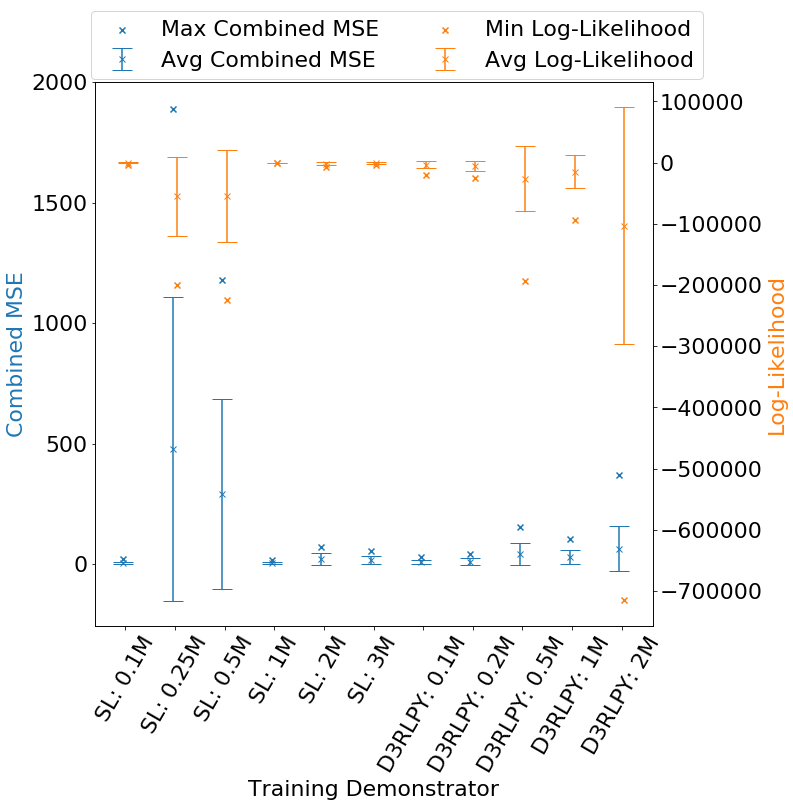

In [96]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
ax2 = ax1.twinx()

trans1 = Affine2D().translate(-0.05, 0.0) + ax1.transData
trans2 = Affine2D().translate(+0.05, 0.0) + ax2.transData

ax1.errorbar(initial_experiment_labels, test_mse_avgs, test_mse_stds, color=cols[0], ls='', marker='x', capsize=10, label='Avg Combined MSE', transform=trans1)
ax1.scatter(initial_experiment_labels, test_mse_maxs, marker='x', color=cols[0], label='Max Combined MSE', transform=trans1)

ax2.errorbar(initial_experiment_labels, test_ll_avgs, test_ll_stds, color=cols[1], ls='', marker='x', capsize=10, label='Avg Log-Likelihood', transform=trans2)
ax2.scatter(initial_experiment_labels, test_ll_mins, marker='x', color=cols[1], label='Min Log-Likelihood', transform=trans2)

ax1.set_xlabel('Training Demonstrator')
ax1.set_xticklabels(initial_experiment_labels, rotation=60)

ax1.set_ylabel('Combined MSE', color=cols[0])
ax2.set_ylabel('Log-Likelihood', color=cols[1])

fig.legend(loc='upper center', ncol=2)

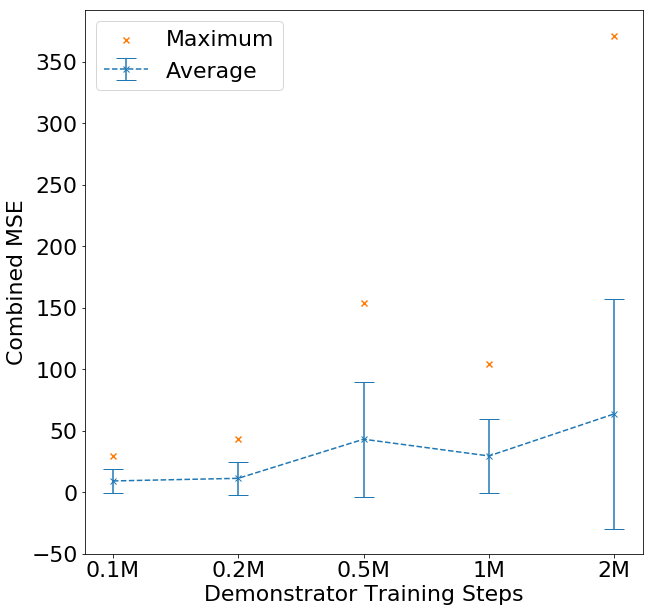

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
initial_avgs = []
initial_stds = []
initial_maxs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].std(ddof=0))
    initial_maxs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].max())
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.scatter(d3rlpy_steps_labels, initial_maxs, marker='x', color=cols[1], label='Maximum')
ax.set_xticklabels(d3rlpy_steps_labels)
ax.set_xlabel('Demonstrator Training Steps')
ax.set_ylabel('Combined MSE')
# ax.set_ylim(-210, 500)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_combined_mse_avgs.png'), pad_inches=0.2, bbox_inches='tight')

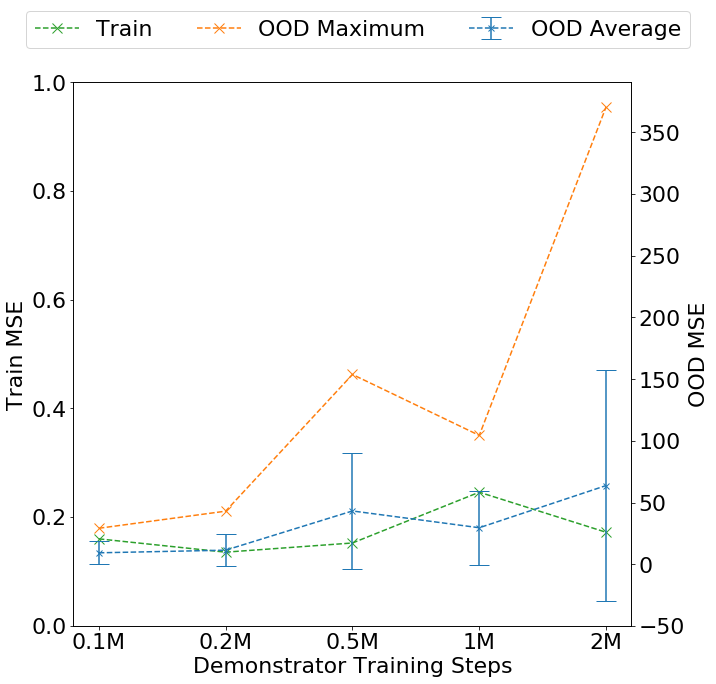

In [114]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
ax2 = ax1.twinx()

train_avgs = []
initial_avgs = []
initial_stds = []
initial_maxs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    train_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'overall_mse'].mean())
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].std(ddof=0))
    initial_maxs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].max())

ax1.plot(d3rlpy_steps_labels, train_avgs, marker='x', ls='--', markersize=10, color=cols[2], label='Train')
ax1.set_ylim(0, 1)
ax1.set_ylabel('Train MSE')

ax2.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[0], ls='--', marker='x', capsize=10, label='OOD Average')
ax2.plot(d3rlpy_steps_labels, initial_maxs, marker='x', ls='--', markersize=10, color=cols[1], label='OOD Maximum')
ax2.set_ylabel('OOD MSE')

ax1.set_xticklabels(d3rlpy_steps_labels)
ax1.set_xlabel('Demonstrator Training Steps')

# ax.set_ylim(-210, 500)
fig.legend(loc='upper center', ncol=3)
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_combined_mse_avgs.png'), pad_inches=0.2, bbox_inches='tight')

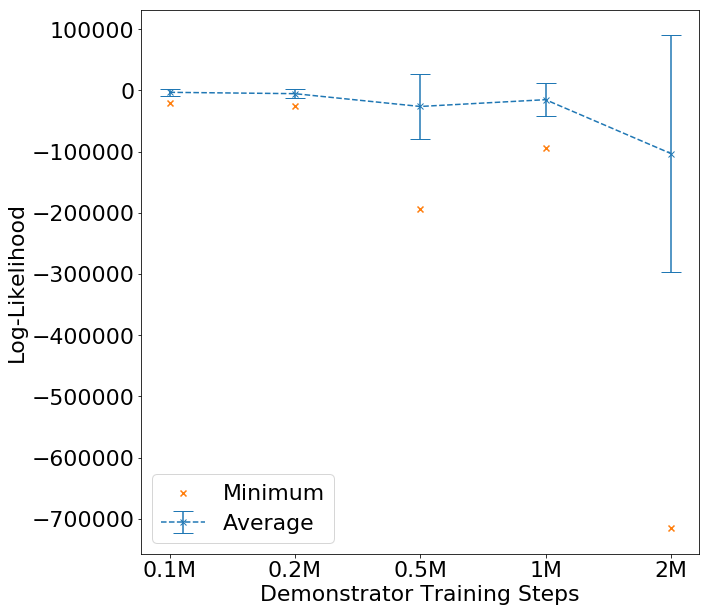

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
initial_avgs = []
initial_stds = []
initial_mins = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].std(ddof=0))
    initial_mins.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].min())
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.scatter(d3rlpy_steps_labels, initial_mins, marker='x', color=cols[1], label='Minimum')
ax.set_xticklabels(d3rlpy_steps_labels)
ax.set_xlabel('Demonstrator Training Steps')
ax.set_ylabel('Log-Likelihood')
# ax.set_ylim(-220000, 50000)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_log_likelihood_avgs.png'), pad_inches=0.2, bbox_inches='tight')

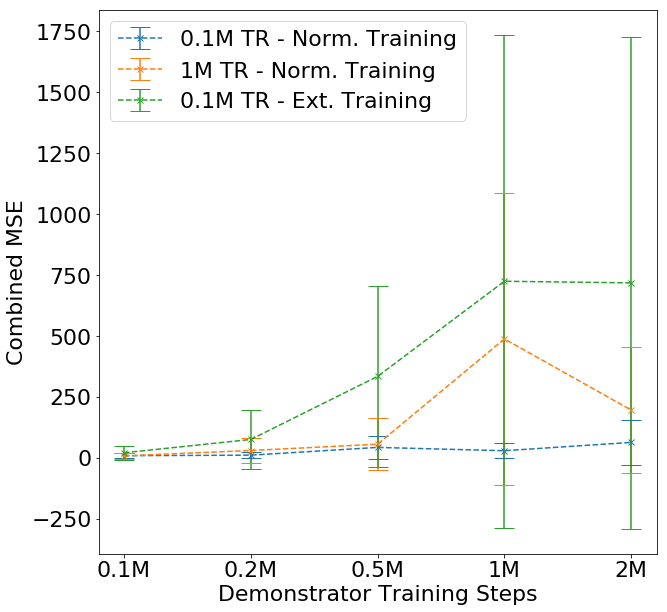

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

initial_avgs = []
initial_stds = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[0], ls='--', marker='x', capsize=10, label='0.1M TR - Norm. Training')

initial_avgs = []
initial_stds = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_1M):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[1], ls='--', marker='x', capsize=10, label='1M TR - Norm. Training')

initial_avgs = []
initial_stds = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_at):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'overall_mse'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[2], ls='--', marker='x', capsize=10, label='0.1M TR - Ext. Training')

ax.set_xticklabels(d3rlpy_steps_labels)
ax.set_xlabel('Demonstrator Training Steps')
ax.set_ylabel('Combined MSE')
# ax.set_ylim(-210, 500)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_combined_mse_avgs_alt_train.png'), pad_inches=0.2, bbox_inches='tight')

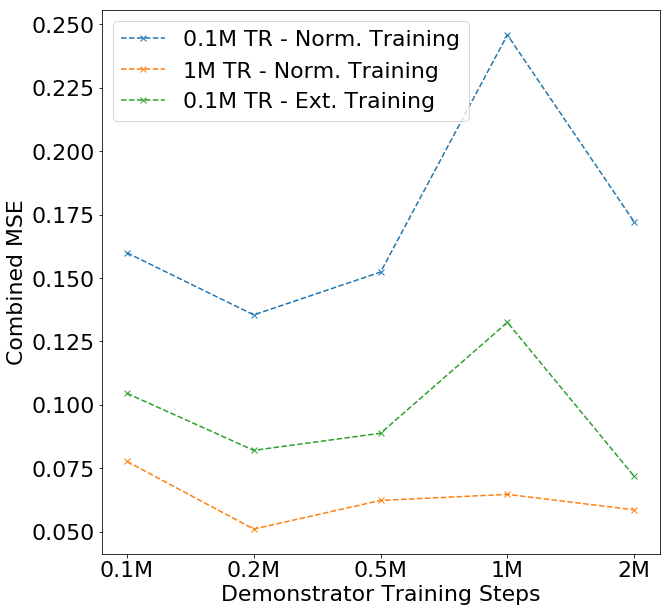

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

initial_avgs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'overall_mse'].mean())
ax.plot(d3rlpy_steps_labels, initial_avgs, color=cols[0], ls='--', marker='x', label='0.1M TR - Norm. Training')

initial_avgs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_1M):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'overall_mse'].mean())
ax.plot(d3rlpy_steps_labels, initial_avgs, color=cols[1], ls='--', marker='x', label='1M TR - Norm. Training')

initial_avgs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_at):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'overall_mse'].mean())
ax.plot(d3rlpy_steps_labels, initial_avgs, color=cols[2], ls='--', marker='x', label='0.1M TR - Ext. Training')

ax.set_xticklabels(d3rlpy_steps_labels)
ax.set_xlabel('Demonstrator Training Steps')
ax.set_ylabel('Combined MSE')
# ax.set_ylim(-210, 500)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_combined_mse_avgs_alt_train_train.png'), pad_inches=0.2, bbox_inches='tight')

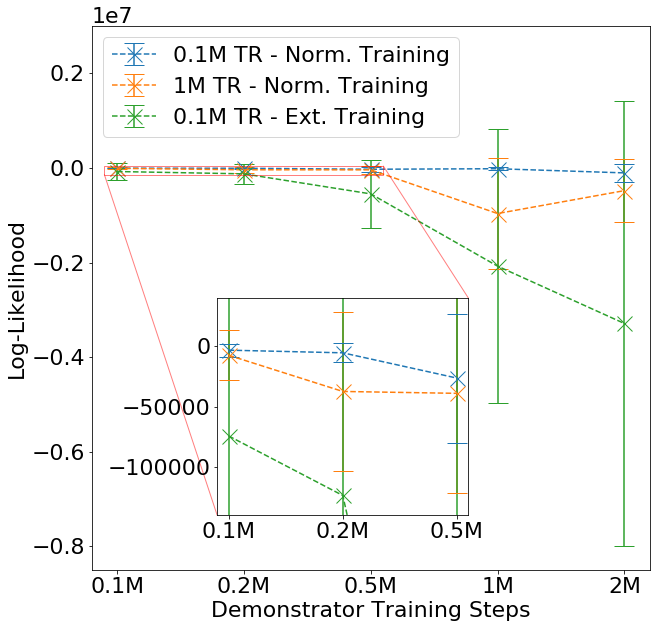

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ins = ax.inset_axes([0.225,0.1,0.45,0.4])

ins_lim = 3

initial_avgs = []
initial_stds = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[0], ls='--', marker='x', markersize=15, capsize=10, label='0.1M TR - Norm. Training')
ins.errorbar(d3rlpy_steps_labels[:ins_lim], initial_avgs[:ins_lim], initial_stds[:ins_lim], color=cols[0], ls='--', marker='x', markersize=15, capsize=10, label='0.1M TR - Norm. Training')


initial_avgs = []
initial_stds = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_1M):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[1], ls='--', marker='x', markersize=15, capsize=10, label='1M TR - Norm. Training')
ins.errorbar(d3rlpy_steps_labels[:ins_lim], initial_avgs[:ins_lim], initial_stds[:ins_lim], color=cols[1], ls='--', marker='x', markersize=15, capsize=10, label='1M TR - Norm. Training')

initial_avgs = []
initial_stds = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_at):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, initial_stds, color=cols[2], ls='--', marker='x', markersize=15, capsize=10, label='0.1M TR - Ext. Training')
ins.errorbar(d3rlpy_steps_labels[:ins_lim], initial_avgs[:ins_lim], initial_stds[:ins_lim], color=cols[2], ls='--', marker='x', markersize=15, capsize=10, label='0.1M TR - Ext. Training')

ax.set_xticklabels(d3rlpy_steps_labels)
ax.set_xlabel('Demonstrator Training Steps')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(-8.5e6, 3e6)
plt.legend(loc='upper left')

ins.set_ylim(-140000, 40000)
ax.indicate_inset_zoom(ins, edgecolor="red")

fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_log_likelihood_avgs_alt_train.png'), pad_inches=0.2, bbox_inches='tight')

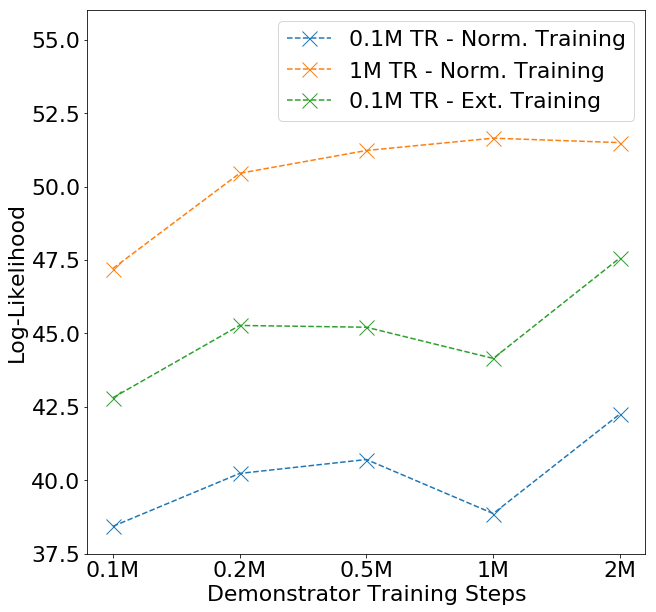

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

initial_avgs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'log_prob'].mean())
ax.errorbar(d3rlpy_steps_labels, initial_avgs, color=cols[0], ls='--', marker='x', markersize=15, capsize=10, label='0.1M TR - Norm. Training')

initial_avgs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_1M):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'log_prob'].mean())
    initial_stds.append(train_res_df.loc[train_res_df['evaluation_dataset'] != train_eval_ds, 'log_prob'].std(ddof=0))
ax.errorbar(d3rlpy_steps_labels, initial_avgs, color=cols[1], ls='--', marker='x', markersize=15, capsize=10, label='1M TR - Norm. Training')

initial_avgs = []
for train_ds_label, train_eval_ds, train_res_df in zip(d3rlpy_steps_labels, d3rlpy_training_eval_ds, d3rlpy_experiment_score_avg_dfs_at):
    initial_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'] == train_eval_ds, 'log_prob'].mean())
ax.errorbar(d3rlpy_steps_labels, initial_avgs, color=cols[2], ls='--', marker='x', markersize=15, capsize=10, label='0.1M TR - Ext. Training')

ax.set_xticklabels(d3rlpy_steps_labels)
ax.set_xlabel('Demonstrator Training Steps')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(37.5, 56)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_demonstrator_log_likelihood_avgs_alt_train_train.png'), pad_inches=0.2, bbox_inches='tight')

,0,1,2
0,0.19,8.58,49.45
1,0.19,8.54,50.22
2,0.18,17.72,198.90
3,0.23,8.60,91.23
4,0.29,3.97,20.19


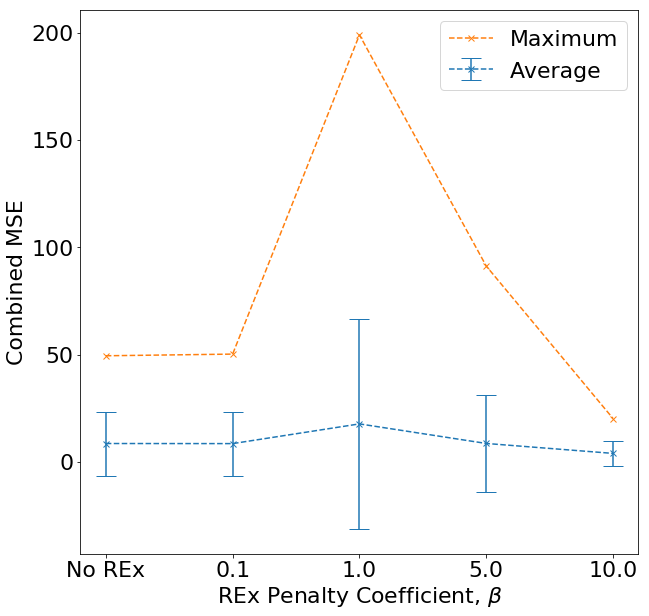

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
train_avgs = []
test_avgs = []
test_stds = []
test_maxs = []
for train_ds_label, train_eval_ds_group, train_res_df in zip(m3_labels, [*[m3_training_datasets]*5], m3_score_avg_dfs):
    train_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].mean())
    test_avgs.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].mean())
    test_stds.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].std(ddof=0))
    test_maxs.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].max())
ax.errorbar(m3_labels, test_avgs, test_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.plot(m3_labels, test_maxs, marker='x', ls='--', color=cols[1], label='Maximum')
ax.set_xticklabels(rex_labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Combined MSE')
ax.set_ylim(None, None)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'novice_combined_mse_avgs.png'), pad_inches=0.2, bbox_inches='tight')
pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

,0,1,2
0,29,-4653,-47804
1,29,-3931,-37236
2,30,-3759,-32212
3,24,-2848,-38089
4,14,-432,-4660


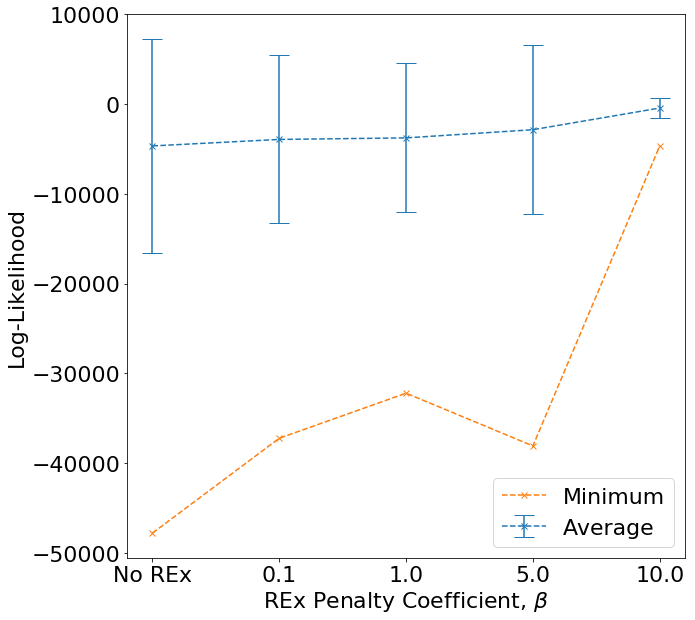

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
train_avgs = []
test_avgs = []
test_stds = []
test_mins = []
for train_ds_label, train_eval_ds_group, train_res_df in zip(m3_labels, [*[m3_training_datasets]*5], m3_score_avg_dfs):
    train_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].mean())
    test_avgs.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].mean())
    test_stds.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].std(ddof=0))
    test_mins.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].min())
ax.errorbar(m3_labels, test_avgs, test_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.plot(m3_labels, test_mins, marker='x', ls='--', color=cols[1], label='Minimum')
ax.set_xticklabels(rex_labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(None, None)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'novice_log_likelihood_avgs.png'), pad_inches=0.2, bbox_inches='tight')
pd.DataFrame([train_avgs, test_avgs, test_mins]).T.astype(int)

,0,1,2
0,0.22,0.64,2.28
1,0.22,0.65,2.51
2,0.22,0.64,2.34
3,0.25,0.65,1.80
4,0.28,0.72,1.96


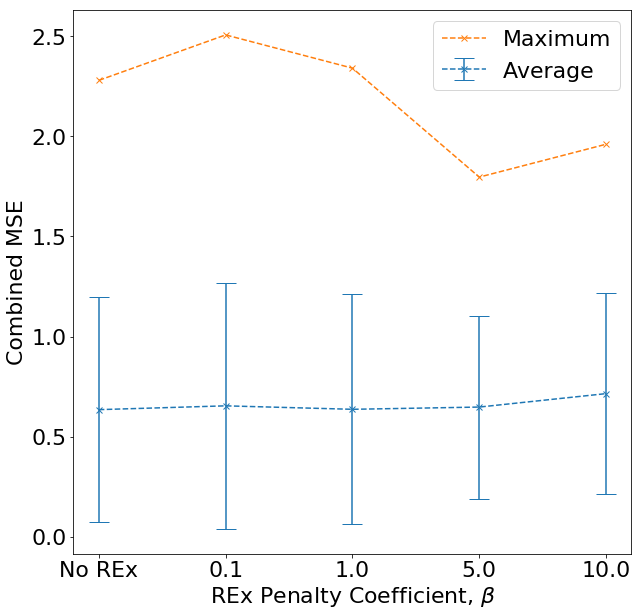

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
train_avgs = []
test_avgs = []
test_stds = []
test_maxs = []
for train_ds_label, train_eval_ds_group, train_res_df in zip(mrt1_labels, [*[mrt_training_datasets]*5], mrt1_score_avg_dfs):
    train_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].mean())
    test_avgs.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].mean())
    test_stds.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].std(ddof=0))
    test_maxs.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'overall_mse'].max())
ax.errorbar(mrt1_labels, test_avgs, test_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.plot(mrt1_labels, test_maxs, marker='x', ls='--', color=cols[1], label='Maximum')
ax.set_xticklabels(rex_labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Combined MSE')
ax.set_ylim(None, None)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'expert_combined_mse_avgs.png'), pad_inches=0.2, bbox_inches='tight')
pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

,0,1,2,3
0,34,-3,55,-183
1,34,-6,65,-222
2,33,-5,63,-214
3,26,7,21,-55
4,23,9,14,-28


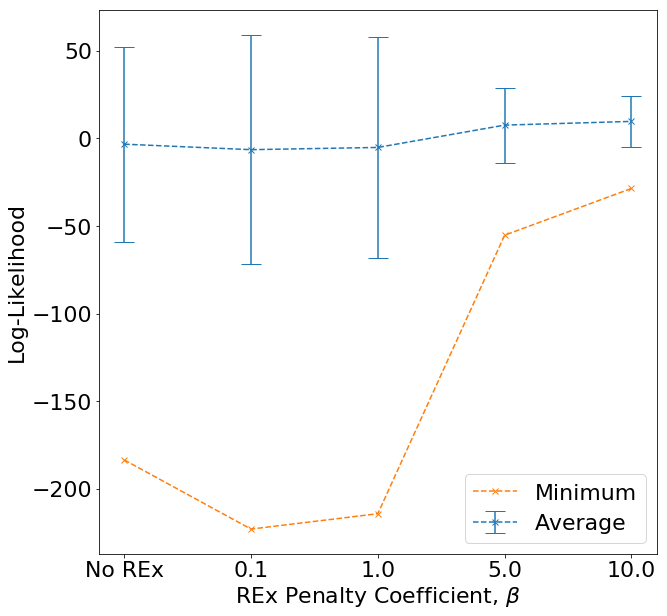

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
train_avgs = []
test_avgs = []
test_stds = []
test_mins = []
for train_ds_label, train_eval_ds_group, train_res_df in zip(mrt1_labels, [*[mrt_training_datasets]*5], mrt1_score_avg_dfs):
    train_avgs.append(train_res_df.loc[train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].mean())
    test_avgs.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].mean())
    test_stds.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].std(ddof=0))
    test_mins.append(train_res_df.loc[~train_res_df['evaluation_dataset'].isin(train_eval_ds_group), 'log_prob'].min())
ax.errorbar(mrt1_labels, test_avgs, test_stds, color=cols[0], ls='--', marker='x', capsize=10, label='Average')
ax.plot(mrt1_labels, test_mins, marker='x', ls='--', color=cols[1], label='Minimum')
ax.set_xticklabels(rex_labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(None, None)
plt.legend()
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'expert_log_likelihood_avgs.png'), pad_inches=0.2, bbox_inches='tight')
pd.DataFrame([train_avgs, test_avgs, test_stds, test_mins]).T.astype(int)

# Error Bar Plots

ValueError: shape mismatch: objects cannot be broadcast to a single shape

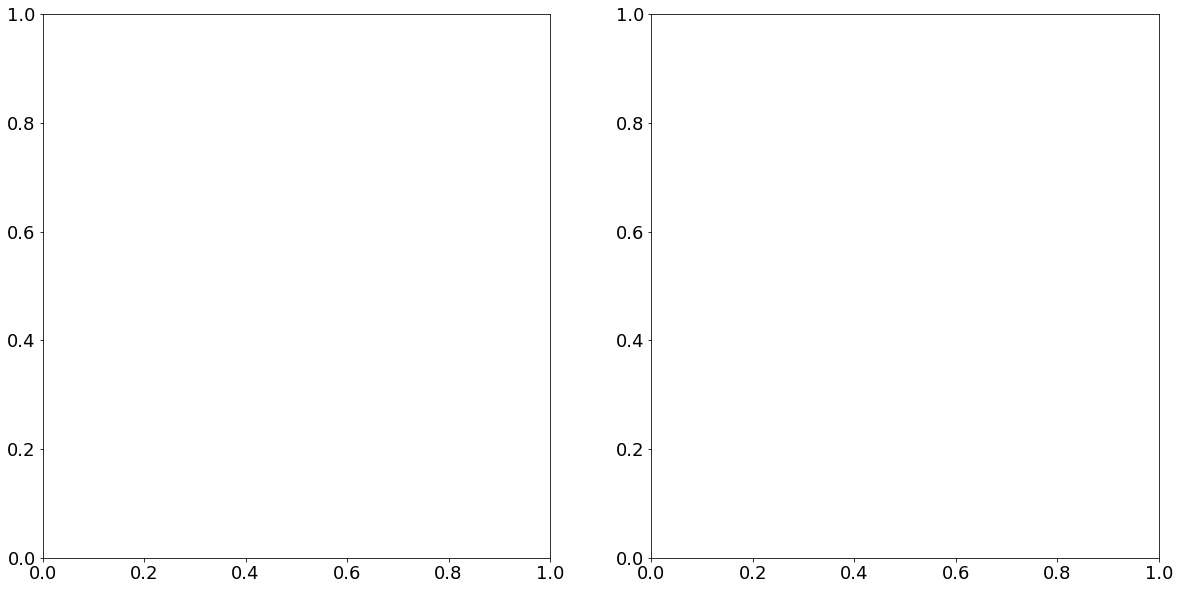

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

metric = 'overall_mse'
scoring_summary_metrics = {}
for results_set, label in zip(experiment_score_avg_dfs, experiment_labels):
    scoring_summary_metrics[label] = {}
    mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(evaluation_datasets), metric]
    scoring_summary_metrics[label]['mean'] = mean_vals.mean()
    scoring_summary_metrics[label]['std'] = mean_vals.std()
scoring_summary_metrics_df = pd.DataFrame().from_dict(scoring_summary_metrics).T

for i in range(2):
    ax[i].errorbar(np.arange(len(experiment_labels)), scoring_summary_metrics_df['mean'].values, scoring_summary_metrics_df['std'].values, ls='', marker='x')
    ax[i].set_xticks(np.arange(len(experiment_labels)))
    ax[i].set_xticklabels(experiment_labels, rotation=45)
    ax[i].set_xlabel('Training Dataset')
    ax[i].set_ylabel('Overall MSE')

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,1)

(0, 1)

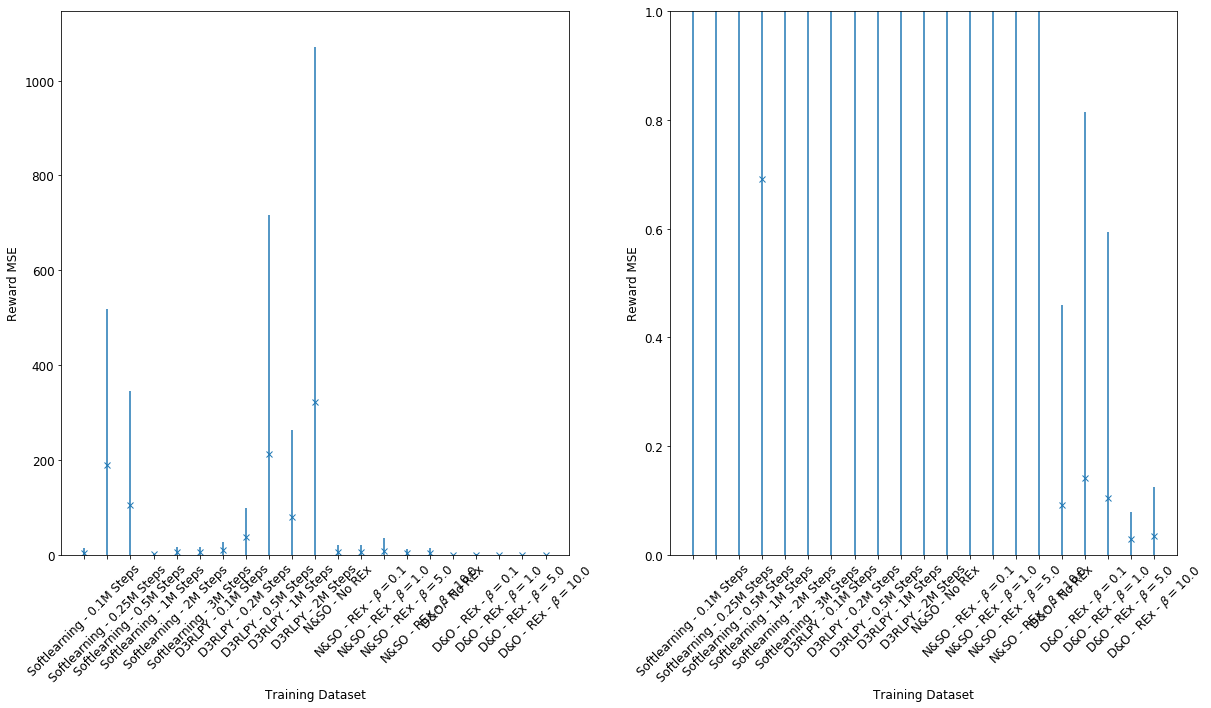

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

metric = 'reward_mse'
scoring_summary_metrics = {}
for results_set, label in zip(experiment_score_avg_dfs, experiment_labels):
    scoring_summary_metrics[label] = {}
    mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(evaluation_datasets), metric]
    scoring_summary_metrics[label]['mean'] = mean_vals.mean()
    scoring_summary_metrics[label]['std'] = mean_vals.std()
scoring_summary_metrics_df = pd.DataFrame().from_dict(scoring_summary_metrics).T

for i in range(2):
    ax[i].errorbar(np.arange(len(experiment_labels)), scoring_summary_metrics_df['mean'].values, scoring_summary_metrics_df['std'].values, ls='', marker='x')
    ax[i].set_xticks(np.arange(len(experiment_labels)))
    ax[i].set_xticklabels(experiment_labels, rotation=45)
    ax[i].set_xlabel('Training Dataset')
    ax[i].set_ylabel('Reward MSE')

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,1)

(-1500, 1000)

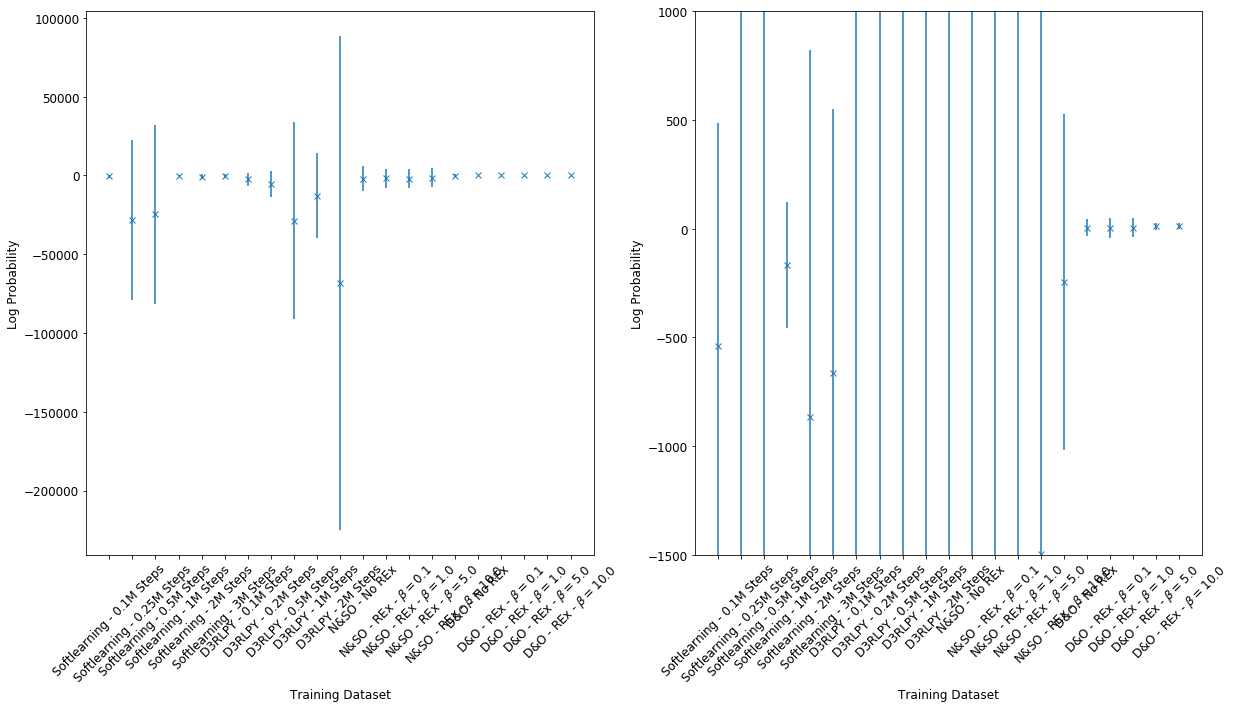

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

metric = 'log_prob'
scoring_summary_metrics = {}
for results_set, label in zip(experiment_score_avg_dfs, experiment_labels):
    scoring_summary_metrics[label] = {}
    mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(evaluation_datasets), metric]
    scoring_summary_metrics[label]['mean'] = mean_vals.mean()
    scoring_summary_metrics[label]['std'] = mean_vals.std(ddof=0)
scoring_summary_metrics_df = pd.DataFrame().from_dict(scoring_summary_metrics).T

for i in range(2):
    ax[i].errorbar(np.arange(len(experiment_labels)), scoring_summary_metrics_df['mean'].values, scoring_summary_metrics_df['std'].values, ls='', marker='x')
    ax[i].set_xticks(np.arange(len(experiment_labels)))
    ax[i].set_xticklabels(experiment_labels, rotation=45)
    ax[i].set_xlabel('Training Dataset')
    ax[i].set_ylabel('Log Probability')

# ax[0].set_ylim(0,None)
ax[1].set_ylim(-1500,1000)

# Breakdown by Dataset - Initial Experiments

In [ ]:
# np.testing.assert_equal(scoring_summary_metrics_df['mean'].values, overall_summary_metrics[:,0])
# np.testing.assert_equal(scoring_summary_metrics_df['std'].values, overall_summary_metrics[:,1])

In [ ]:
metric = 'overall_mse'
overall_summary_metrics = np.zeros((len(initial_experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(initial_experiment_score_avg_dfs), 2))

for j, results_set in enumerate(initial_experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

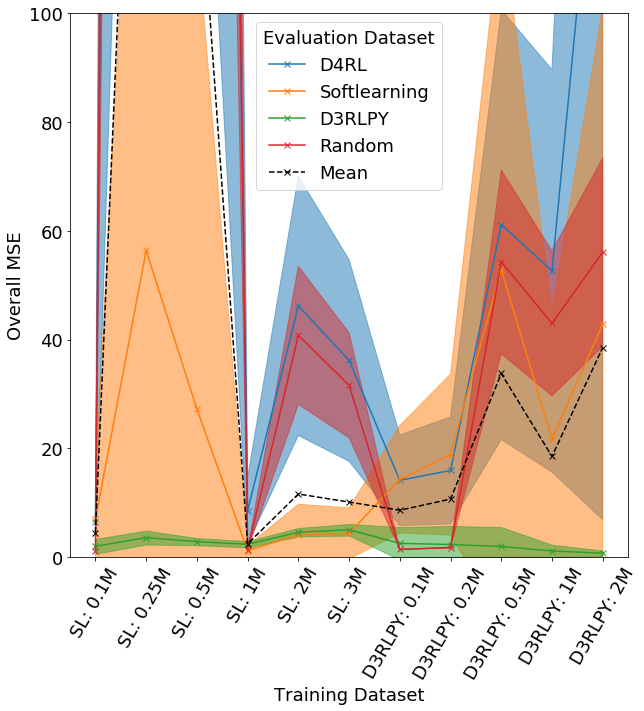

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
overall_summary_metrics = np.zeros((len(initial_experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(initial_experiment_score_avg_dfs), 2))

for j, results_set in enumerate(initial_experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for i, (exp_row, label) in enumerate(zip(dataset_summary_metrics, evaluation_datasets_groups.keys())):
    ax.plot(np.arange(len(initial_experiment_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
    ax.fill_between(np.arange(len(initial_experiment_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)

ax.plot(np.arange(len(initial_experiment_labels)), overall_summary_metrics[:,0], c='k', ls='--', marker='x', label='Mean')

ax.set_xticks(np.arange(len(initial_experiment_labels)))
ax.set_xticklabels(initial_experiment_labels, rotation=60)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0, 100)
ax.legend(title='Evaluation Dataset')

fig.savefig(os.path.join(FIG_DIR, 'ch4', 'pol_exps_ood_overall_mse_comparison.png'), pad_inches=0.2, bbox_inches='tight')

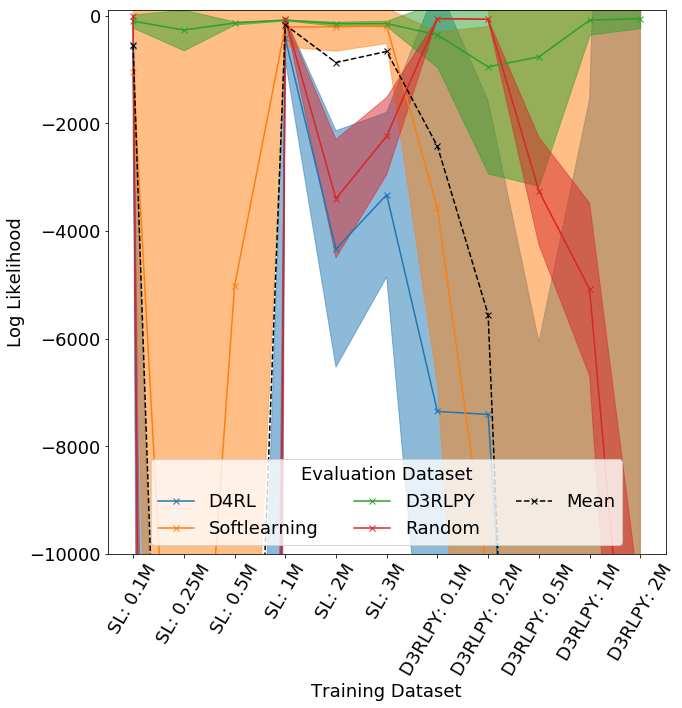

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
overall_summary_metrics = np.zeros((len(initial_experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(initial_experiment_score_avg_dfs), 2))

for j, results_set in enumerate(initial_experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for i, (exp_row, label) in enumerate(zip(dataset_summary_metrics, evaluation_datasets_groups.keys())):
    ax.plot(np.arange(len(initial_experiment_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
    ax.fill_between(np.arange(len(initial_experiment_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)

ax.plot(np.arange(len(initial_experiment_labels)), overall_summary_metrics[:,0], c='k', ls='--', marker='x', label='Mean')

ax.set_xticks(np.arange(len(initial_experiment_labels)))
ax.set_xticklabels(initial_experiment_labels, rotation=60)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-10000, 100)
ax.legend(loc='lower center', title='Evaluation Dataset', ncol=3)

fig.savefig(os.path.join(FIG_DIR, 'ch4', 'pol_exps_ood_log_likelihood_comparison.png'), pad_inches=0.2, bbox_inches='tight')

# Breakdown by Dataset - REx Experiments

(-5, 60)

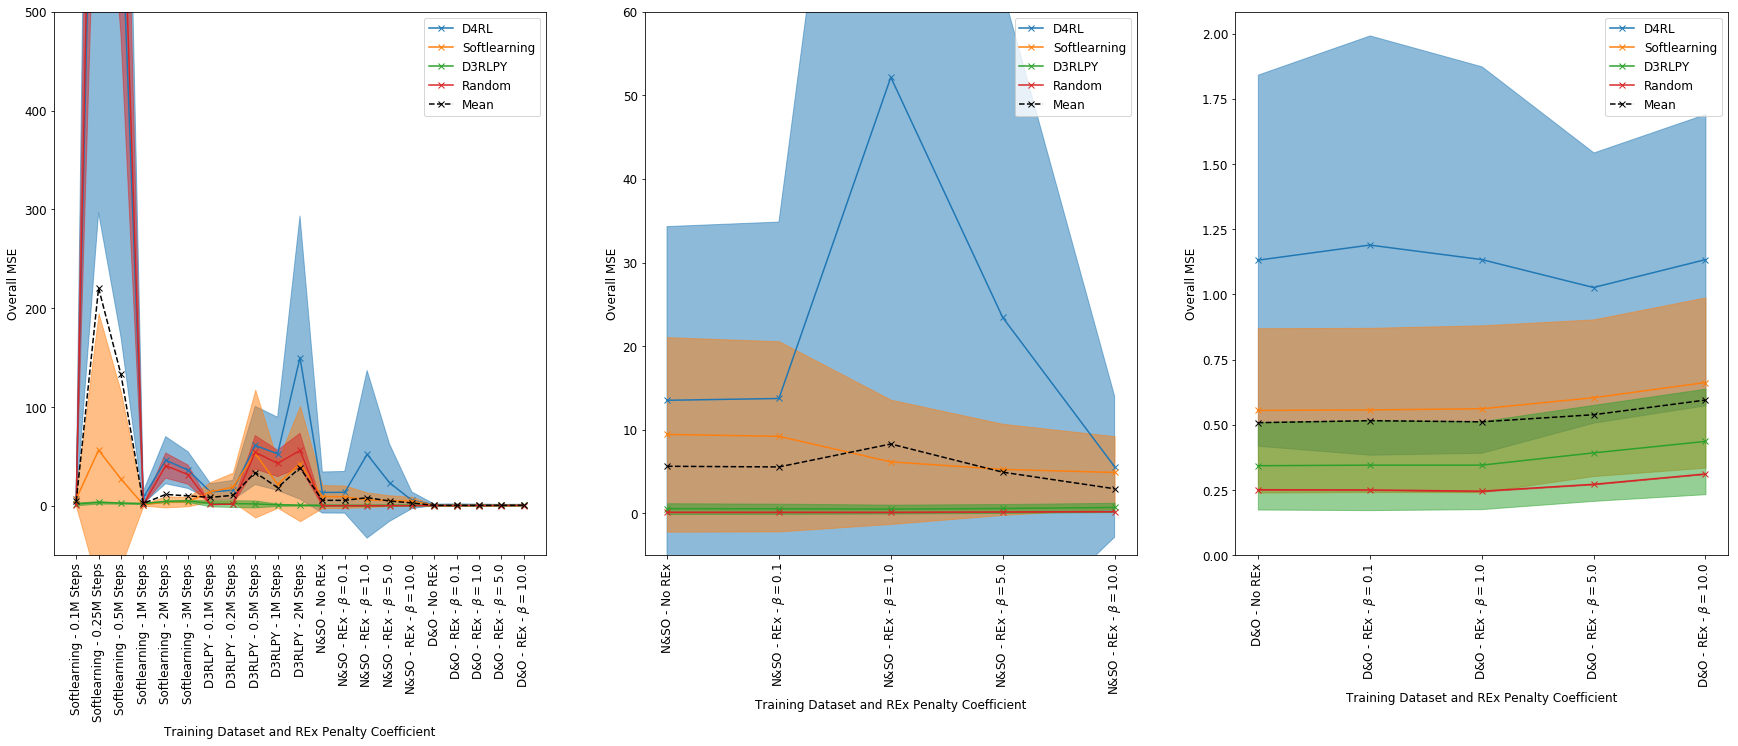

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

metric = 'overall_mse'
overall_summary_metrics = np.zeros((len(experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(experiment_score_avg_dfs), 2))

for j, results_set in enumerate(experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for ax_ind, (s_ind, e_ind) in enumerate([(0,100),(11,16),(16,100)]):
    plot_vals = dataset_summary_metrics[:,s_ind:e_ind,:]
    plot_labels = experiment_labels[s_ind:e_ind]

    for i, (exp_row, label) in enumerate(zip(plot_vals, evaluation_datasets_groups.keys())):
        ax[ax_ind].plot(np.arange(len(plot_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
        ax[ax_ind].fill_between(np.arange(len(plot_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)
    
    ax[ax_ind].plot(np.arange(len(plot_labels)), overall_summary_metrics[s_ind:e_ind,0], c='k', ls='--', marker='x', label='Mean')

    ax[ax_ind].set_xticks(np.arange(len(plot_labels)))
    ax[ax_ind].set_xticklabels(plot_labels, rotation=90)
    ax[ax_ind].set_ylim(0)
    ax[ax_ind].set_xlabel('Training Dataset and REx Penalty Coefficient')
    ax[ax_ind].set_ylabel('Overall MSE')
    ax[ax_ind].legend()

ax[0].set_ylim(-50, 500)
ax[1].set_ylim(-5, 60)

(-0.2, 1)

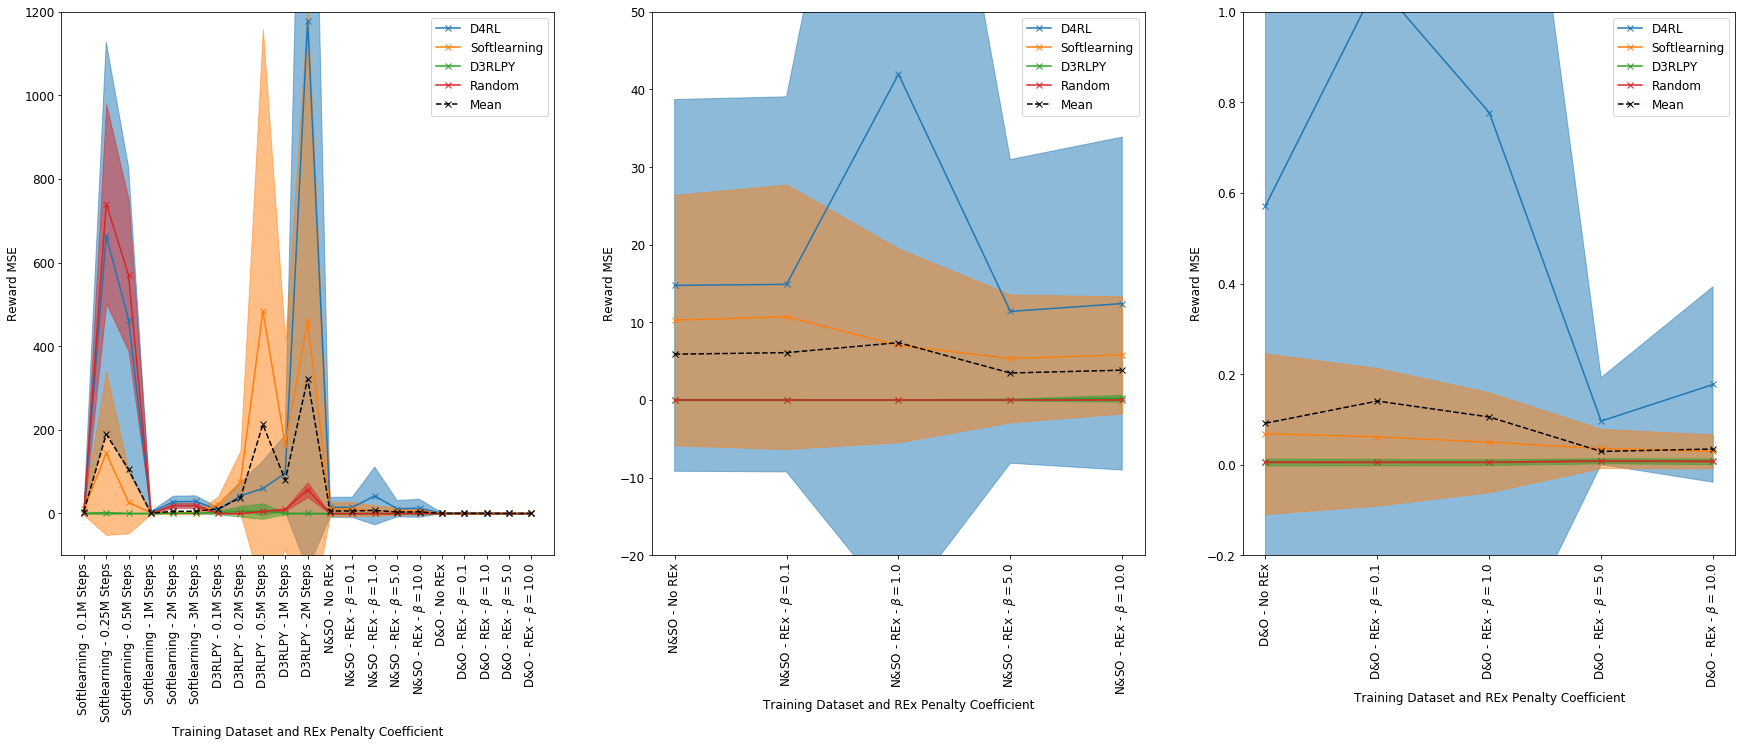

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

metric = 'reward_mse'
overall_summary_metrics = np.zeros((len(experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(experiment_score_avg_dfs), 2))

for j, results_set in enumerate(experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for ax_ind, (s_ind, e_ind) in enumerate([(0,100),(11,16),(16,100)]):
    plot_vals = dataset_summary_metrics[:,s_ind:e_ind,:]
    plot_labels = experiment_labels[s_ind:e_ind]

    for i, (exp_row, label) in enumerate(zip(plot_vals, evaluation_datasets_groups.keys())):
        ax[ax_ind].plot(np.arange(len(plot_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
        ax[ax_ind].fill_between(np.arange(len(plot_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)
    
    ax[ax_ind].plot(np.arange(len(plot_labels)), overall_summary_metrics[s_ind:e_ind,0], c='k', ls='--', marker='x', label='Mean')

    ax[ax_ind].set_xticks(np.arange(len(plot_labels)))
    ax[ax_ind].set_xticklabels(plot_labels, rotation=90)
    ax[ax_ind].set_xlabel('Training Dataset and REx Penalty Coefficient')
    ax[ax_ind].set_ylabel('Reward MSE')
    ax[ax_ind].legend()

ax[0].set_ylim(-100, 1200)
ax[1].set_ylim(-20, 50)
ax[2].set_ylim(-0.2, 1)

(-15000, 4000)

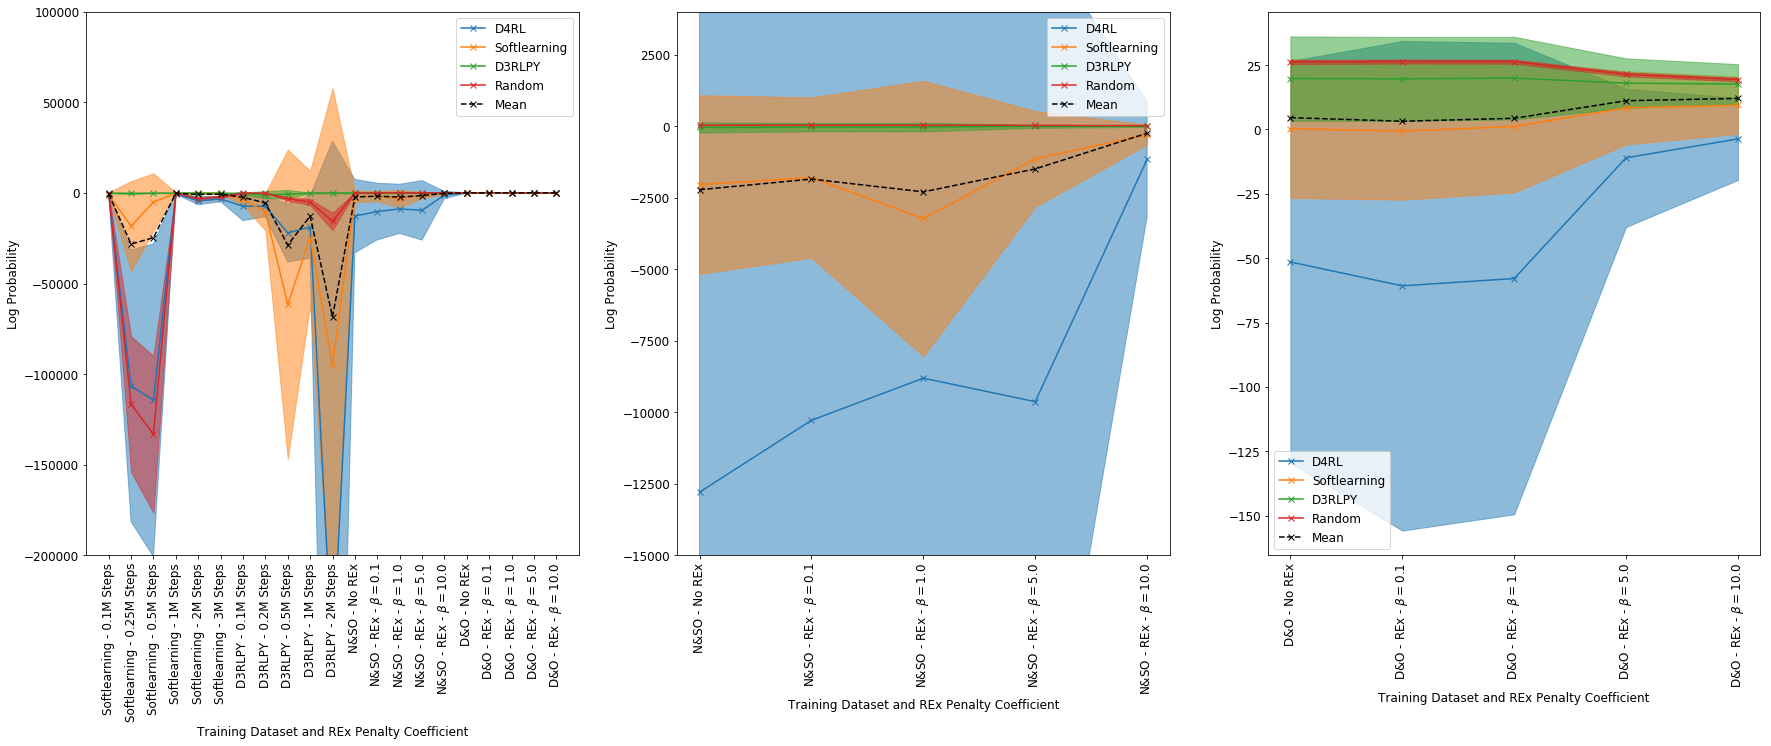

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

metric = 'log_prob'
overall_summary_metrics = np.zeros((len(experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(experiment_score_avg_dfs), 2))

for j, results_set in enumerate(experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for ax_ind, (s_ind, e_ind) in enumerate([(0,100),(11,16),(16,100)]):
    plot_vals = dataset_summary_metrics[:,s_ind:e_ind,:]
    plot_labels = experiment_labels[s_ind:e_ind]

    for i, (exp_row, label) in enumerate(zip(plot_vals, evaluation_datasets_groups.keys())):
        ax[ax_ind].plot(np.arange(len(plot_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
        ax[ax_ind].fill_between(np.arange(len(plot_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)
    
    ax[ax_ind].plot(np.arange(len(plot_labels)), overall_summary_metrics[s_ind:e_ind,0], c='k', ls='--', marker='x', label='Mean')

    ax[ax_ind].set_xticks(np.arange(len(plot_labels)))
    ax[ax_ind].set_xticklabels(plot_labels, rotation=90)
    ax[ax_ind].set_xlabel('Training Dataset and REx Penalty Coefficient')
    ax[ax_ind].set_ylabel('Log Probability')
    ax[ax_ind].legend()

ax[0].set_ylim(-200000, 100000)
ax[1].set_ylim(-15000, 4000)

# Heatmaps

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap_min=-1000
# cmap_max=50
# metric = 'log_prob'
# scoring_summary_metrics = np.zeros((len(experiment_score_avg_dfs), len(evaluation_datasets_groups), 2))
# for i, (results_set, label) in enumerate(zip(experiment_score_avg_dfs, experiment_labels)):
#     for j, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
#         mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric]
#         scoring_summary_metrics[i,j,0] = mean_vals.mean()
#         scoring_summary_metrics[i,j,1] = mean_vals.std()

# mat = ax.matshow(scoring_summary_metrics[:,:,0])
# mat.set_clim(vmin=cmap_min, vmax=cmap_max)
# ax.set_xticks(range(len(evaluation_datasets_groups)))
# ax.set_yticks(range(len(experiment_score_avg_dfs)))
# ax.set_xticklabels(evaluation_datasets_groups.keys(), rotation=45)
# ax.set_yticklabels(experiment_labels)
# ax.set_xlabel('Evaluation Dataset Group')
# ax.set_ylabel('Policy Training Dataset')

# for (j,k), z in np.ndenumerate(scoring_summary_metrics[:,:,0]):
#     if z != 0:
#         ax.text(k, j, '{:.0f}\n±{:.0f}'.format(scoring_summary_metrics[j,k,0], scoring_summary_metrics[j,k,1]), ha="center", va="center", color='w' if scoring_summary_metrics[j,k,0] < -750 else 'k')


In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap_min=-1
# cmap_max=100
# metric = 'overall_mse'
# scoring_summary_metrics = np.zeros((len(experiment_score_avg_dfs), len(evaluation_datasets_groups), 2))
# for i, (results_set, label) in enumerate(zip(experiment_score_avg_dfs, experiment_labels)):
#     for j, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
#         mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric]
#         scoring_summary_metrics[i,j,0] = mean_vals.mean()
#         scoring_summary_metrics[i,j,1] = mean_vals.std()

# mat = ax.matshow(scoring_summary_metrics[:,:,0])
# mat.set_clim(vmin=cmap_min, vmax=cmap_max)
# ax.set_xticks(range(len(evaluation_datasets_groups)))
# ax.set_yticks(range(len(experiment_score_avg_dfs)))
# ax.set_xticklabels(evaluation_datasets_groups.keys(), rotation=45)
# ax.set_yticklabels(experiment_labels)
# ax.set_xlabel('Evaluation Dataset Group')
# ax.set_ylabel('Policy Training Dataset')

# for (j,k), z in np.ndenumerate(scoring_summary_metrics[:,:,0]):
#     if z != 0:
#         ax.text(k, j, '{:.2f}\n±{:.2f}'.format(scoring_summary_metrics[j,k,0], scoring_summary_metrics[j,k,1]), ha="center", va="center", color='w' if scoring_summary_metrics[j,k,0] < 30 else 'k')


In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# cmap_min=-1
# cmap_max=100
# metric = 'reward_mse'
# scoring_summary_metrics = np.zeros((len(experiment_score_avg_dfs), len(evaluation_datasets_groups), 2))
# for i, (results_set, label) in enumerate(zip(experiment_score_avg_dfs, experiment_labels)):
#     for j, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
#         mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric]
#         scoring_summary_metrics[i,j,0] = mean_vals.mean()
#         scoring_summary_metrics[i,j,1] = mean_vals.std()

# mat = ax.matshow(scoring_summary_metrics[:,:,0])
# mat.set_clim(vmin=cmap_min, vmax=cmap_max)
# ax.set_xticks(range(len(evaluation_datasets_groups)))
# ax.set_yticks(range(len(experiment_score_avg_dfs)))
# ax.set_xticklabels(evaluation_datasets_groups.keys(), rotation=45)
# ax.set_yticklabels(experiment_labels)
# ax.set_xlabel('Evaluation Dataset Group')
# ax.set_ylabel('Policy Training Dataset')

# for (j,k), z in np.ndenumerate(scoring_summary_metrics[:,:,0]):
#     if z != 0:
#         ax.text(k, j, '{:.3f}\n±{:.3f}'.format(scoring_summary_metrics[j,k,0], scoring_summary_metrics[j,k,1]), ha="center", va="center", color='w' if scoring_summary_metrics[j,k,0] < 30 else 'k')
